In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("D:\data science default")

In [3]:
df1= pd.read_csv("quikr_car.csv")
df1

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df1. shape


(892, 6)

In [5]:
df1.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
df1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# Quality checking of data
# in year there are some cat data need to remove 
 # after that price there are also some level of cat data present need cleaning
 # also need to chng the type
 #  kms_driven i need to remove the cat value in  after that need to change into int  form it has some null values also

  # fuel types have some  nan value
   # in name we need 3 word of start

# cleaning

In [8]:
df1["year"]= pd.to_numeric(df1["year"], errors="coerce")

In [9]:
df1["year"]=df1["year"].fillna(df1["year"].mean())

In [10]:
df1["year"].isnull().sum()

0

In [11]:
df1["year"].astype("int")

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    2012
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: int32

In [13]:
df1['Price'] = df1['Price'].str.replace(",", "", regex=False)  #

In [15]:
df1["Price"]

0              80000
1             425000
2      Ask For Price
3             325000
4             575000
           ...      
887           310000
888           260000
889           390000
890           180000
891           160000
Name: Price, Length: 892, dtype: object

In [16]:
df1['Price'] = df1['Price'].replace({'Ask For Price': None})

In [17]:
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

In [18]:
df1["Price"]=df1["Price"].fillna(df1["Price"].mean()) 

In [19]:
df1["Price"].dtype

dtype('float64')

In [20]:
df1["kms_driven"]=df1["kms_driven"].str.split(" ").str[0]

In [21]:
df1["kms_driven"]=df1["kms_driven"].replace(",","",regex=True)

In [22]:
df1["kms_driven"]= pd.to_numeric(df1["kms_driven"], errors= "coerce")

In [23]:
df1["kms_driven"]= df1["kms_driven"].fillna(df1["kms_driven"].mean())

In [24]:
df1["kms_driven"]

0      45000.000000
1         40.000000
2      22000.000000
3      28000.000000
4      36000.000000
           ...     
887    46010.550119
888    27000.000000
889    40000.000000
890    46010.550119
891    46010.550119
Name: kms_driven, Length: 892, dtype: float64

In [25]:
mode_value = df1["fuel_type"].mode()[0]

In [26]:
df1["fuel_type"]=df1["fuel_type"].fillna(mode_value )

In [27]:
df1["fuel_type"].isnull().sum()

0

In [28]:
df1["name"]= df1["name"].str.split(" ").str.slice(0,3).str.join(" ")

In [29]:
df1["name"].isnull().sum()

0

In [30]:
# here we have clean the data 

In [31]:
# let do some EDA ANALYSIS

In [32]:
# first divide  all  numerical and cat column 

In [33]:
 numercial=df1.select_dtypes(include= ["float"])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


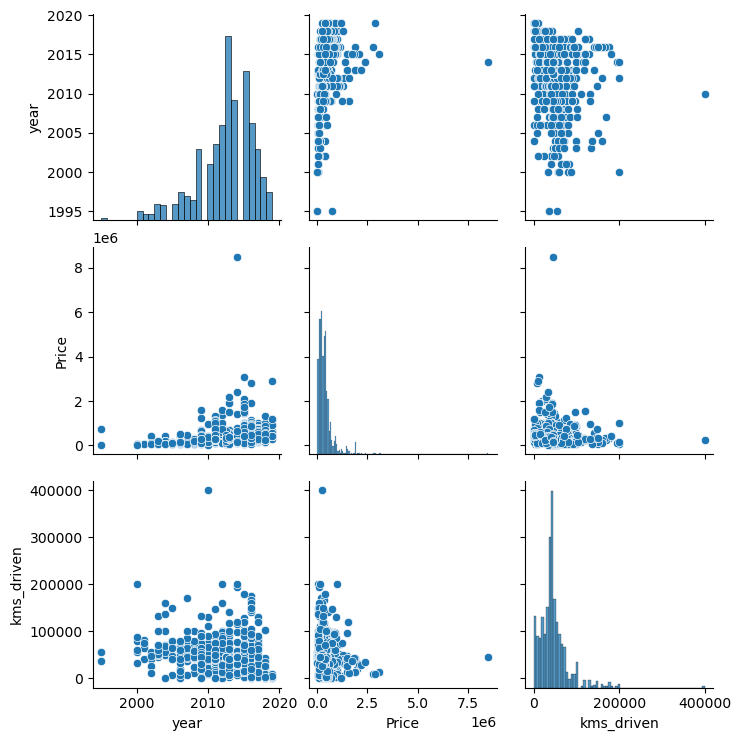

In [34]:
sns.pairplot(df1.select_dtypes(include= "float"))

In [35]:
cat=df1.select_dtypes(include= ["object", "int"])

In [36]:
cat

,name,company,fuel_type
0,Hyundai Santro Xing,Hyundai,Petrol
1,Mahindra Jeep CL550,Mahindra,Diesel
2,Maruti Suzuki Alto,Maruti,Petrol
3,Hyundai Grand i10,Hyundai,Petrol
4,Ford EcoSport Titanium,Ford,Diesel
...,...,...,...
887,Ta,Tara,Petrol
888,Tata Zest XM,Tata,Diesel
889,Mahindra Quanto C8,Mahindra,Diesel
890,Honda Amaze 1.2,Honda,Petrol


In [37]:
# let do some EDA ANALYSIS

In [38]:
df1

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.000000,80000.000000,45000.000000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.000000,425000.000000,40.000000,Diesel
2,Maruti Suzuki Alto,Maruti,2018.000000,404688.534422,22000.000000,Petrol
3,Hyundai Grand i10,Hyundai,2014.000000,325000.000000,28000.000000,Petrol
4,Ford EcoSport Titanium,Ford,2014.000000,575000.000000,36000.000000,Diesel
...,...,...,...,...,...,...
887,Ta,Tara,2012.523753,310000.000000,46010.550119,Petrol
888,Tata Zest XM,Tata,2018.000000,260000.000000,27000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013.000000,390000.000000,40000.000000,Diesel
890,Honda Amaze 1.2,Honda,2014.000000,180000.000000,46010.550119,Petrol


In [39]:
# we take the help of inbuild function  profiling

In [40]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport


In [41]:

profile = ProfileReport(df1, title="Your Data Profile", explorative=True)
profile.to_file("data_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
# check the outlier 

In [43]:
 numercial.describe(percentiles=[.01,.02,.03,0.4,0.5,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,40%,50%,90%,95%,96%,97%,98%,99%,max
year,892.0,2012.523753,3.910047,1995.0,2000.91,2002.00,2003.00,2012.523753,2013.0,2017.0,2018.0,2018.00,2018.0,2019.0,2019.00,2019.0
Price,892.0,404688.534422,456301.408246,30000.0,40000.00,52820.00,60000.00,250000.000000,310000.0,747999.1,1011250.0,1209000.00,1499000.0,1747500.0,1891911.01,8500003.0
kms_driven,892.0,46010.550119,33408.767337,0.0,36.85,368.06,1752.75,38000.000000,43000.0,80000.0,100470.0,106559.96,130000.0,147540.0,175402.70,400000.0


In [44]:
# outlier treatment with help of remove by iqr 

In [49]:
 numerical1=numercial.apply(outlier_percentile)

<Axes: >

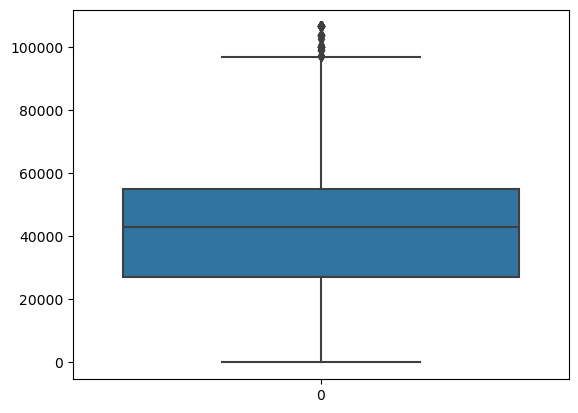

In [50]:
sns.boxplot(numerical1["kms_driven"])

In [ ]:
df2

In [ ]:
 cat=df1.select_dtypes(include= "object")

In [ ]:
df2.describe(percentiles=[.01,.02,.03,0.4,0.5,0.90,0.95,0.96,0.97,0.98,0.99]).T

In [51]:
num= pd.concat([numerical1, cat], axis=1)

In [ ]:
num

In [48]:
def outlier_percentile(x):
    x=x.clip(upper=x.quantile(.96))  # upperside outlier 
    # x=x.clip(lower=x.quantile(0.01))  # lowerside outlier
    return x

In [ ]:
# model

In [77]:
x= num.drop(columns=["Price","target_price"])
x

,year,kms_driven,name,company,fuel_type
0,2007.000000,45000.000000,Hyundai Santro Xing,Hyundai,Petrol
1,2006.000000,40.000000,Mahindra Jeep CL550,Mahindra,Diesel
2,2018.000000,22000.000000,Maruti Suzuki Alto,Maruti,Petrol
3,2014.000000,28000.000000,Hyundai Grand i10,Hyundai,Petrol
4,2014.000000,36000.000000,Ford EcoSport Titanium,Ford,Diesel
...,...,...,...,...,...
887,2012.523753,46010.550119,Ta,Tara,Petrol
888,2018.000000,27000.000000,Tata Zest XM,Tata,Diesel
889,2013.000000,40000.000000,Mahindra Quanto C8,Mahindra,Diesel
890,2014.000000,46010.550119,Honda Amaze 1.2,Honda,Petrol


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target_price', ylabel='Count'>

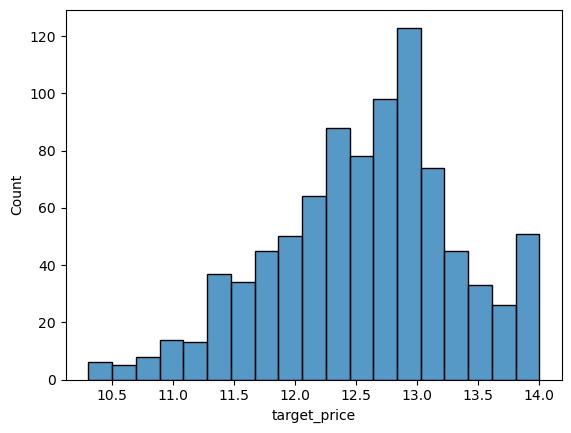

In [78]:

num["target_price"]= np.log1p(num["Price"])
sns.histplot(num["target_price"])

In [79]:
y= num["target_price"]

In [80]:
from sklearn. model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=42)

In [ ]:
X_train

In [82]:
from  sklearn.linear_model import LinearRegression
from sklearn. compose import ColumnTransformer
from sklearn .metrics import mean_absolute_error,r2_score
from sklearn. preprocessing import  OneHotEncoder, StandardScaler
from sklearn. pipeline import make_pipeline

In [83]:
trf2 = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), ['name', 'company', "fuel_type"])
    ],
    remainder='passthrough'
)

In [84]:
trf3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'kms_driven'])
    ],
    remainder='passthrough'  # Keep other columns as they are
)

In [85]:
lr =LinearRegression()

In [86]:
pipe=  Pipeline([("trf2",trf2),("lrs",lr)])

In [87]:
pipe.fit(X_train, y_train)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('lrs', LinearRegression())])

In [88]:
from sklearn.pipeline import Pipeline

In [89]:
pre_train=pipe.predict(X_train)
pre_train

array([13.18959233, 13.25378592, 12.43347958, 12.420532  , 12.8949453 ,
       12.30930839, 12.10829529, 12.53670876, 12.72278817, 13.18850529,
       12.44496282, 11.88499106, 13.08165782, 11.92196957, 11.77258922,
       12.97993527, 12.34924685, 12.07961596, 11.72190636, 11.95306895,
       13.09555246, 12.6659579 , 12.18205947, 12.50239407, 13.16796448,
       12.5543919 , 11.98256484, 12.06826348, 12.14591819, 12.43758186,
       14.00206652, 12.68211813, 12.47865867, 12.91312066, 12.50401259,
       12.87362144, 13.16893595, 13.25498053, 11.60875626, 12.36641109,
       13.24469901, 12.39657902, 12.91845092, 12.41675257, 11.59970773,
       13.250102  , 12.54606615, 13.08270001, 12.3669614 , 11.31909348,
       11.28916143, 12.68693636, 13.16725654, 10.70893267, 12.51500861,
       12.67897002, 13.15972354, 12.55566126, 12.27925606, 12.61973605,
       13.54854121, 12.34199202, 14.05235445, 12.31903583, 13.14499164,
       11.42986633, 12.5616035 , 13.08585493, 12.10682839, 13.15

In [91]:
mse_in_train= mean_absolute_error(pre_train,y_train)
mse_in_train

0.14418362834106782

In [92]:
r2_score(pre_train,y_train)

0.8845016073379158

In [ ]:
import pickle

In [93]:
import pickle

with open('pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)


In [94]:
 pipe=pickle.load(open('pipe.pkl', 'rb'))

In [98]:
input_data = pd.DataFrame({
    "year": [2010],  # Note the brackets to create a list
    "kms_driven": [55000],
    "name": ["Skoda Superb 1.8"],
    "company": ["Ford"],
    "fuel_type": ["Diesel"]})

In [99]:
input_data = pd.DataFrame({
    "year": [2010],  # Note the brackets to create a list
    "kms_driven": [550000],
    "name": ["Maruti Suzuki Swift"],
    "company": ["Ford"],
    "fuel_type": ["Diesel"]})

In [97]:
pipe.predict(input_data)

array([146923.0127979])

In [100]:
pipe.predict(input_data)

array([146923.0127979])

In [120]:
list=[10,2,10,0,10]
c=["amaan","ayan","asfan","abdul"]